In [1]:
# Launch PyMOL with the "-R" option (pymol -R), 
# open a Python 3 notebook, then execute 
# remote control of PyMOL (RPC) with XML-RPC:
# https://pymolwiki.org/index.php/Jupyter
# https://pymolwiki.org/index.php/RPC
#
# $HOME/pymol-open-source-build/bin/pymol -Rcp

import xmlrpc.client as xmlrpclib
from xmlrpc.client import ServerProxy
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

from IPython import display

In [2]:
import os
from collections import defaultdict, Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dir_path = '/home/eva/Internships/Greiff/ABodyBuilder/models_sabdab'
model_path = '/home/eva/Internships/Greiff/ABodyBuilder/models_sabdab/{}/output/{}'

In [4]:
pdb_files = []
for _, _, files in os.walk(dir_path):
    pdb_files.extend([f for f in files if f[0].isdigit() and f.endswith('imgt_scheme.pdb')])

In [5]:
pdb_files

['2zch_rank1_imgt_scheme.pdb',
 '1w72_rank1_imgt_scheme.pdb',
 '6jp7_rank1_imgt_scheme.pdb',
 '2b1h_rank1_imgt_scheme.pdb',
 '1n5y_rank1_imgt_scheme.pdb',
 '3o41_rank1_imgt_scheme.pdb',
 '1kc5_rank1_imgt_scheme.pdb',
 '6y92_rank1_imgt_scheme.pdb',
 '1uac_rank1_imgt_scheme.pdb',
 '5dhy_rank1_imgt_scheme.pdb',
 '1qfu_rank1_imgt_scheme.pdb',
 '1dbb_rank1_imgt_scheme.pdb',
 '3v4u_rank1_imgt_scheme.pdb',
 '2a6j_rank1_imgt_scheme.pdb',
 '1lo4_rank1_imgt_scheme.pdb',
 '4i3r_rank1_imgt_scheme.pdb',
 '1wz1_rank1_imgt_scheme.pdb',
 '1ifh_rank1_imgt_scheme.pdb',
 '2uud_rank1_imgt_scheme.pdb',
 '6gk7_rank1_imgt_scheme.pdb',
 '6mnf_rank1_imgt_scheme.pdb',
 '4gq9_rank1_imgt_scheme.pdb',
 '6y9a_rank1_imgt_scheme.pdb',
 '1eo8_rank1_imgt_scheme.pdb',
 '3ntc_rank1_imgt_scheme.pdb',
 '2ajz_rank1_imgt_scheme.pdb',
 '6osh_rank1_imgt_scheme.pdb',
 '4l5f_rank1_imgt_scheme.pdb',
 '4ypg_rank1_imgt_scheme.pdb',
 '3ncj_rank1_imgt_scheme.pdb',
 '3jau_rank1_imgt_scheme.pdb',
 '1qle_rank1_imgt_scheme.pdb',
 '4laq_r

In [6]:
print(len(pdb_files))

567


In [7]:
%%time

cmd.reinitialize()
rmsds = defaultdict(list)

for n, pdb in enumerate(pdb_files):
    structure = pdb.split('_')[0]
    model_file = model_path.format(structure, pdb)
    model = pdb.replace('.pdb', '')
    print('Align #{}'.format(n))
    try:
        cmd.fetch(structure)
        cmd.load(model_file)
        rmsd_align = cmd.align(model, structure)
        rmsd_super = cmd.super(model, structure)
        rmsds[structure].extend([rmsd_align[0], rmsd_super[0]])
    except Exception:
        print('Something went wrong :(\nTry to check if {} or {} structures are already uploaded in PyMol'.format(model, structure))
        continue

Align #0
Align #1
Align #2
Align #3
Align #4
Align #5
Align #6
Align #7
Align #8
Align #9
Align #10
Align #11
Align #12
Align #13
Align #14
Align #15
Align #16
Align #17
Align #18
Align #19
Align #20
Align #21
Align #22
Align #23
Align #24
Align #25
Align #26
Align #27
Align #28
Align #29
Align #30
Align #31
Align #32
Align #33
Align #34
Align #35
Align #36
Align #37
Align #38
Align #39
Align #40
Align #41
Align #42
Align #43
Align #44
Align #45
Align #46
Align #47
Align #48
Align #49
Align #50
Align #51
Align #52
Align #53
Align #54
Align #55
Align #56
Align #57
Align #58
Align #59
Align #60
Align #61
Align #62
Align #63
Align #64
Align #65
Align #66
Align #67
Align #68
Align #69
Align #70
Align #71
Align #72
Align #73
Align #74
Align #75
Align #76
Align #77
Align #78
Align #79
Align #80
Align #81
Align #82
Align #83
Align #84
Align #85
Align #86
Align #87
Align #88
Align #89
Align #90
Align #91
Align #92
Align #93
Align #94
Align #95
Align #96
Align #97
Align #98
Align #99
Align #100

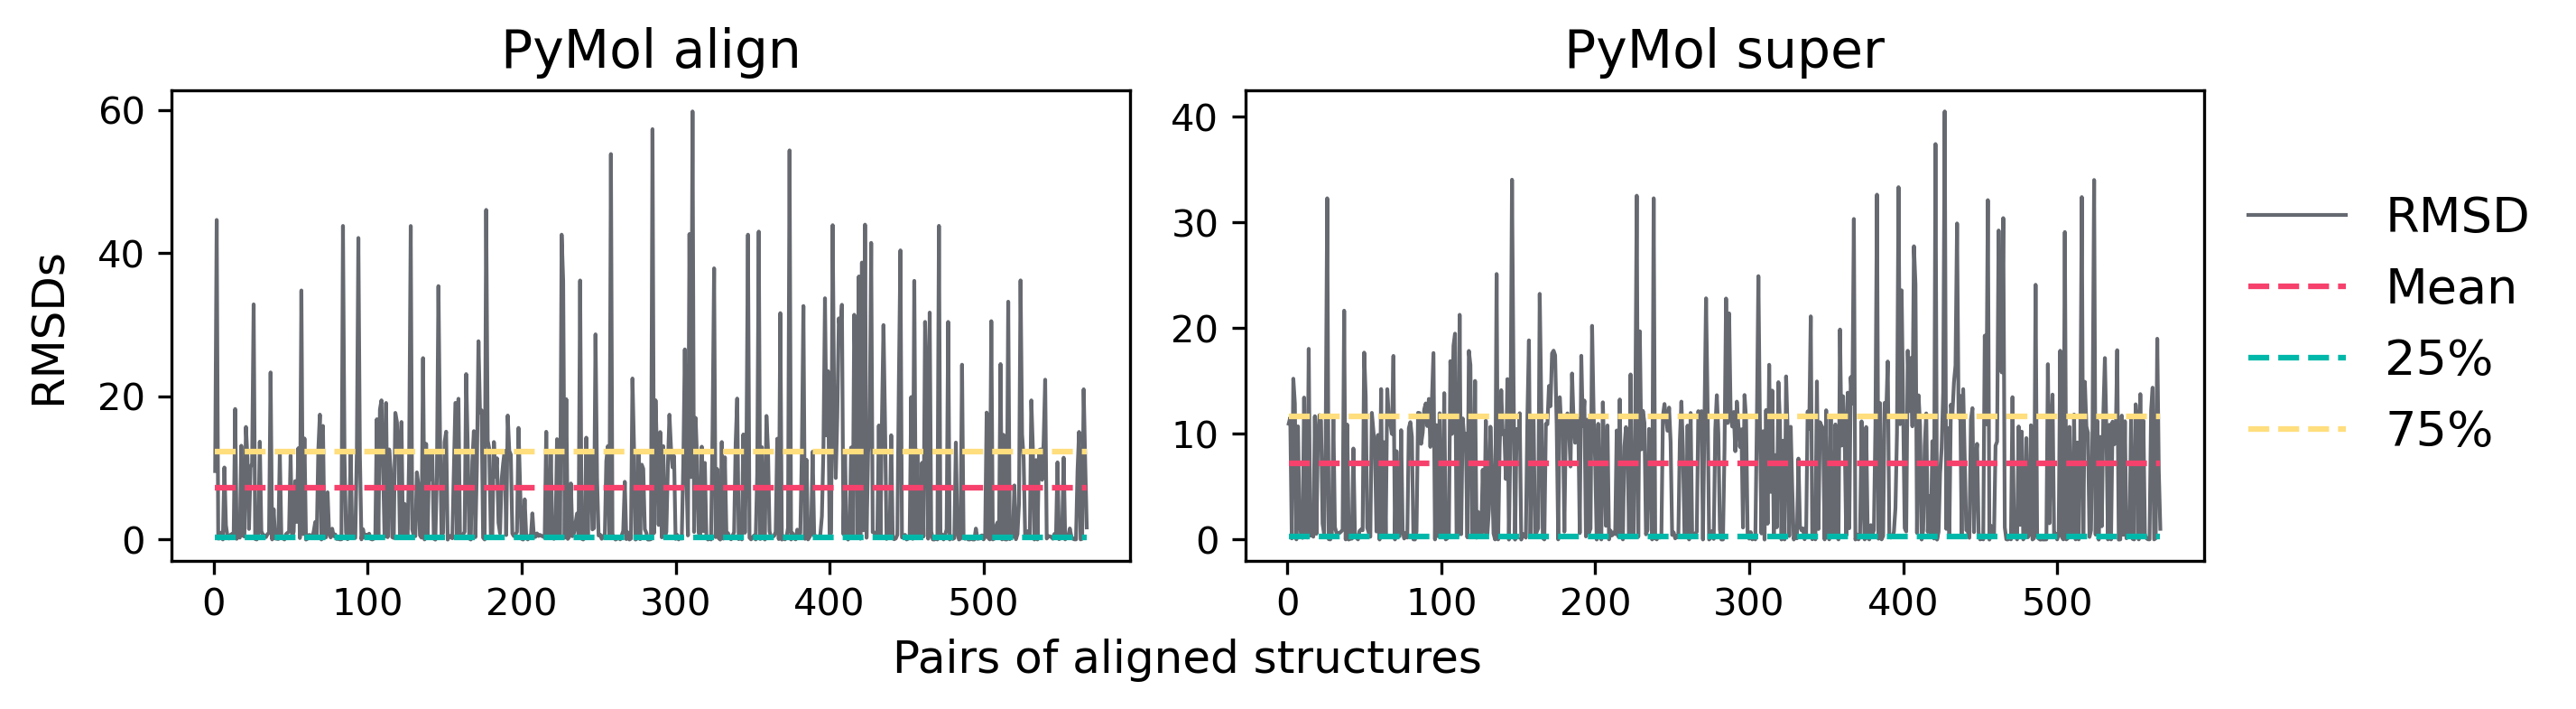

In [8]:
#figure = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=300)
ax = ax.flatten()

labels = ['RMSD', 'Mean', '25%', '75%']

x = np.arange(1, len(rmsds.keys())+1, 1)
y_align = [v[0] for v in rmsds.values()]
y_super = [v[1] for v in rmsds.values()]

df_align = pd.DataFrame(y_align, index=rmsds.keys())
desc_align = df_align.describe()
q25_align = desc_align.loc['25%']
mean_align = desc_align.loc['mean']
q75_align = desc_align.loc['75%']

df_super = pd.DataFrame(y_super, index=rmsds.keys())
desc_super = df_super.describe()
q25_super = desc_super.loc['25%']
mean_super = desc_super.loc['mean']
q75_super = desc_super.loc['75%']

ax[0].plot(x, y_align, linewidth=1, alpha=0.7, color='#252a34')
ax[0].plot(x, [mean_align]*len(x), linestyle='dashed', linewidth=1.5, color='#f6416c')
ax[0].plot(x, [q25_align]*len(x), linestyle='dashed', linewidth=1.5, color='#00b8a9')
ax[0].plot(x, [q75_align]*len(x), linestyle='dashed', linewidth=1.5, color='#ffde7d')
ax[0].set_title('PyMol align', fontsize=14)

ax[1].plot(x, y_super, linewidth=1, alpha=0.7, color='#252a34')
ax[1].plot(x, [mean_super]*len(x), linestyle='dashed', linewidth=1.5, color='#f6416c')
ax[1].plot(x, [q25_super]*len(x), linestyle='dashed', linewidth=1.5, color='#00b8a9')
ax[1].plot(x, [q75_super]*len(x), linestyle='dashed', linewidth=1.5, color='#ffde7d')
ax[1].set_title('PyMol super', fontsize=14)

ax[1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Pairs of aligned structures", fontsize=12)
plt.ylabel("RMSDs", fontsize=12)

fig.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('search_CDRs.csv')

pdbs = np.ndarray.flatten(df[['PDB']].values)
cdrs = df[['CDRs (imgt)']].values

d = defaultdict(dict, {k:{} for k in pdbs})
fabs = [cdr[0].split('\n') for cdr in cdrs]

for pdb, fab in zip(pdbs, fabs):
    hls = [hl for hl in fab if not hl.startswith('Fab')]
    for k in hls:
        d[pdb][k.split(':')[0]] = k.split(':')[1].strip()

In [10]:
count_hls = []
_ = [count_hls.extend(list(v.keys())) for v in d.values()]
Counter(count_hls)

Counter({'H1': 4253,
         'H2': 4253,
         'H3': 4253,
         'L1': 3810,
         'L2': 3810,
         'L3': 3810})

In [11]:
d_lengths = defaultdict(dict, {k:{} for k in pdbs})

for k1, v1 in d.items():
    for k2, v2 in v1.items():
        d_lengths[k1][k2] = len(v2)

In [12]:
d_lengths

defaultdict(dict,
            {'7c2e': {'H1': 8, 'H2': 8, 'H3': 21},
             '1mhp': {'L1': 5, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 7, 'H3': 12},
             '4c57': {'H1': 8, 'H2': 8, 'H3': 15},
             '7c2l': {'L1': 11, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 21},
             '4ydl': {'L1': 7, 'L2': 3, 'L3': 5, 'H1': 8, 'H2': 8, 'H3': 12},
             '1xiw': {'L1': 6, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 15},
             '4ydi': {'L1': 6, 'L2': 3, 'L3': 5, 'H1': 8, 'H2': 8, 'H3': 15},
             '6nv0': {'L1': 11, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 11},
             '4ydk': {'L1': 6, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 22},
             '4ydj': {'L1': 4, 'L2': 3, 'L3': 6, 'H1': 13, 'H2': 8, 'H3': 23},
             '6ffj': {'L1': 6, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 18},
             '5vke': {'L1': 6, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 11},
             '4ydv': {'L1': 12, 'L2': 3, 'L3': 9, 'H1': 8, 'H2': 8, 'H3': 19},
             '6eyn

In [13]:
cdr_l1 = {}.fromkeys(pdbs)
cdr_l2 = {}.fromkeys(pdbs)
cdr_l3 = {}.fromkeys(pdbs)
cdr_h1 = {}.fromkeys(pdbs)
cdr_h2 = {}.fromkeys(pdbs)
cdr_h3 = {}.fromkeys(pdbs)

for k1, v1 in d_lengths.items():
    for k2, v2 in v1.items():
        if k2 == 'H1':
            cdr_h1[k1] = v2
        if k2 == 'H2':
            cdr_h2[k1] = v2
        if k2 == 'H3': 
            cdr_h3[k1] = v2
        if k2 == 'L1':
            cdr_l1[k1] = v2
        if k2 == 'L2':
            cdr_l2[k1] = v2
        if k2 == 'L3': 
            cdr_l3[k1] = v2

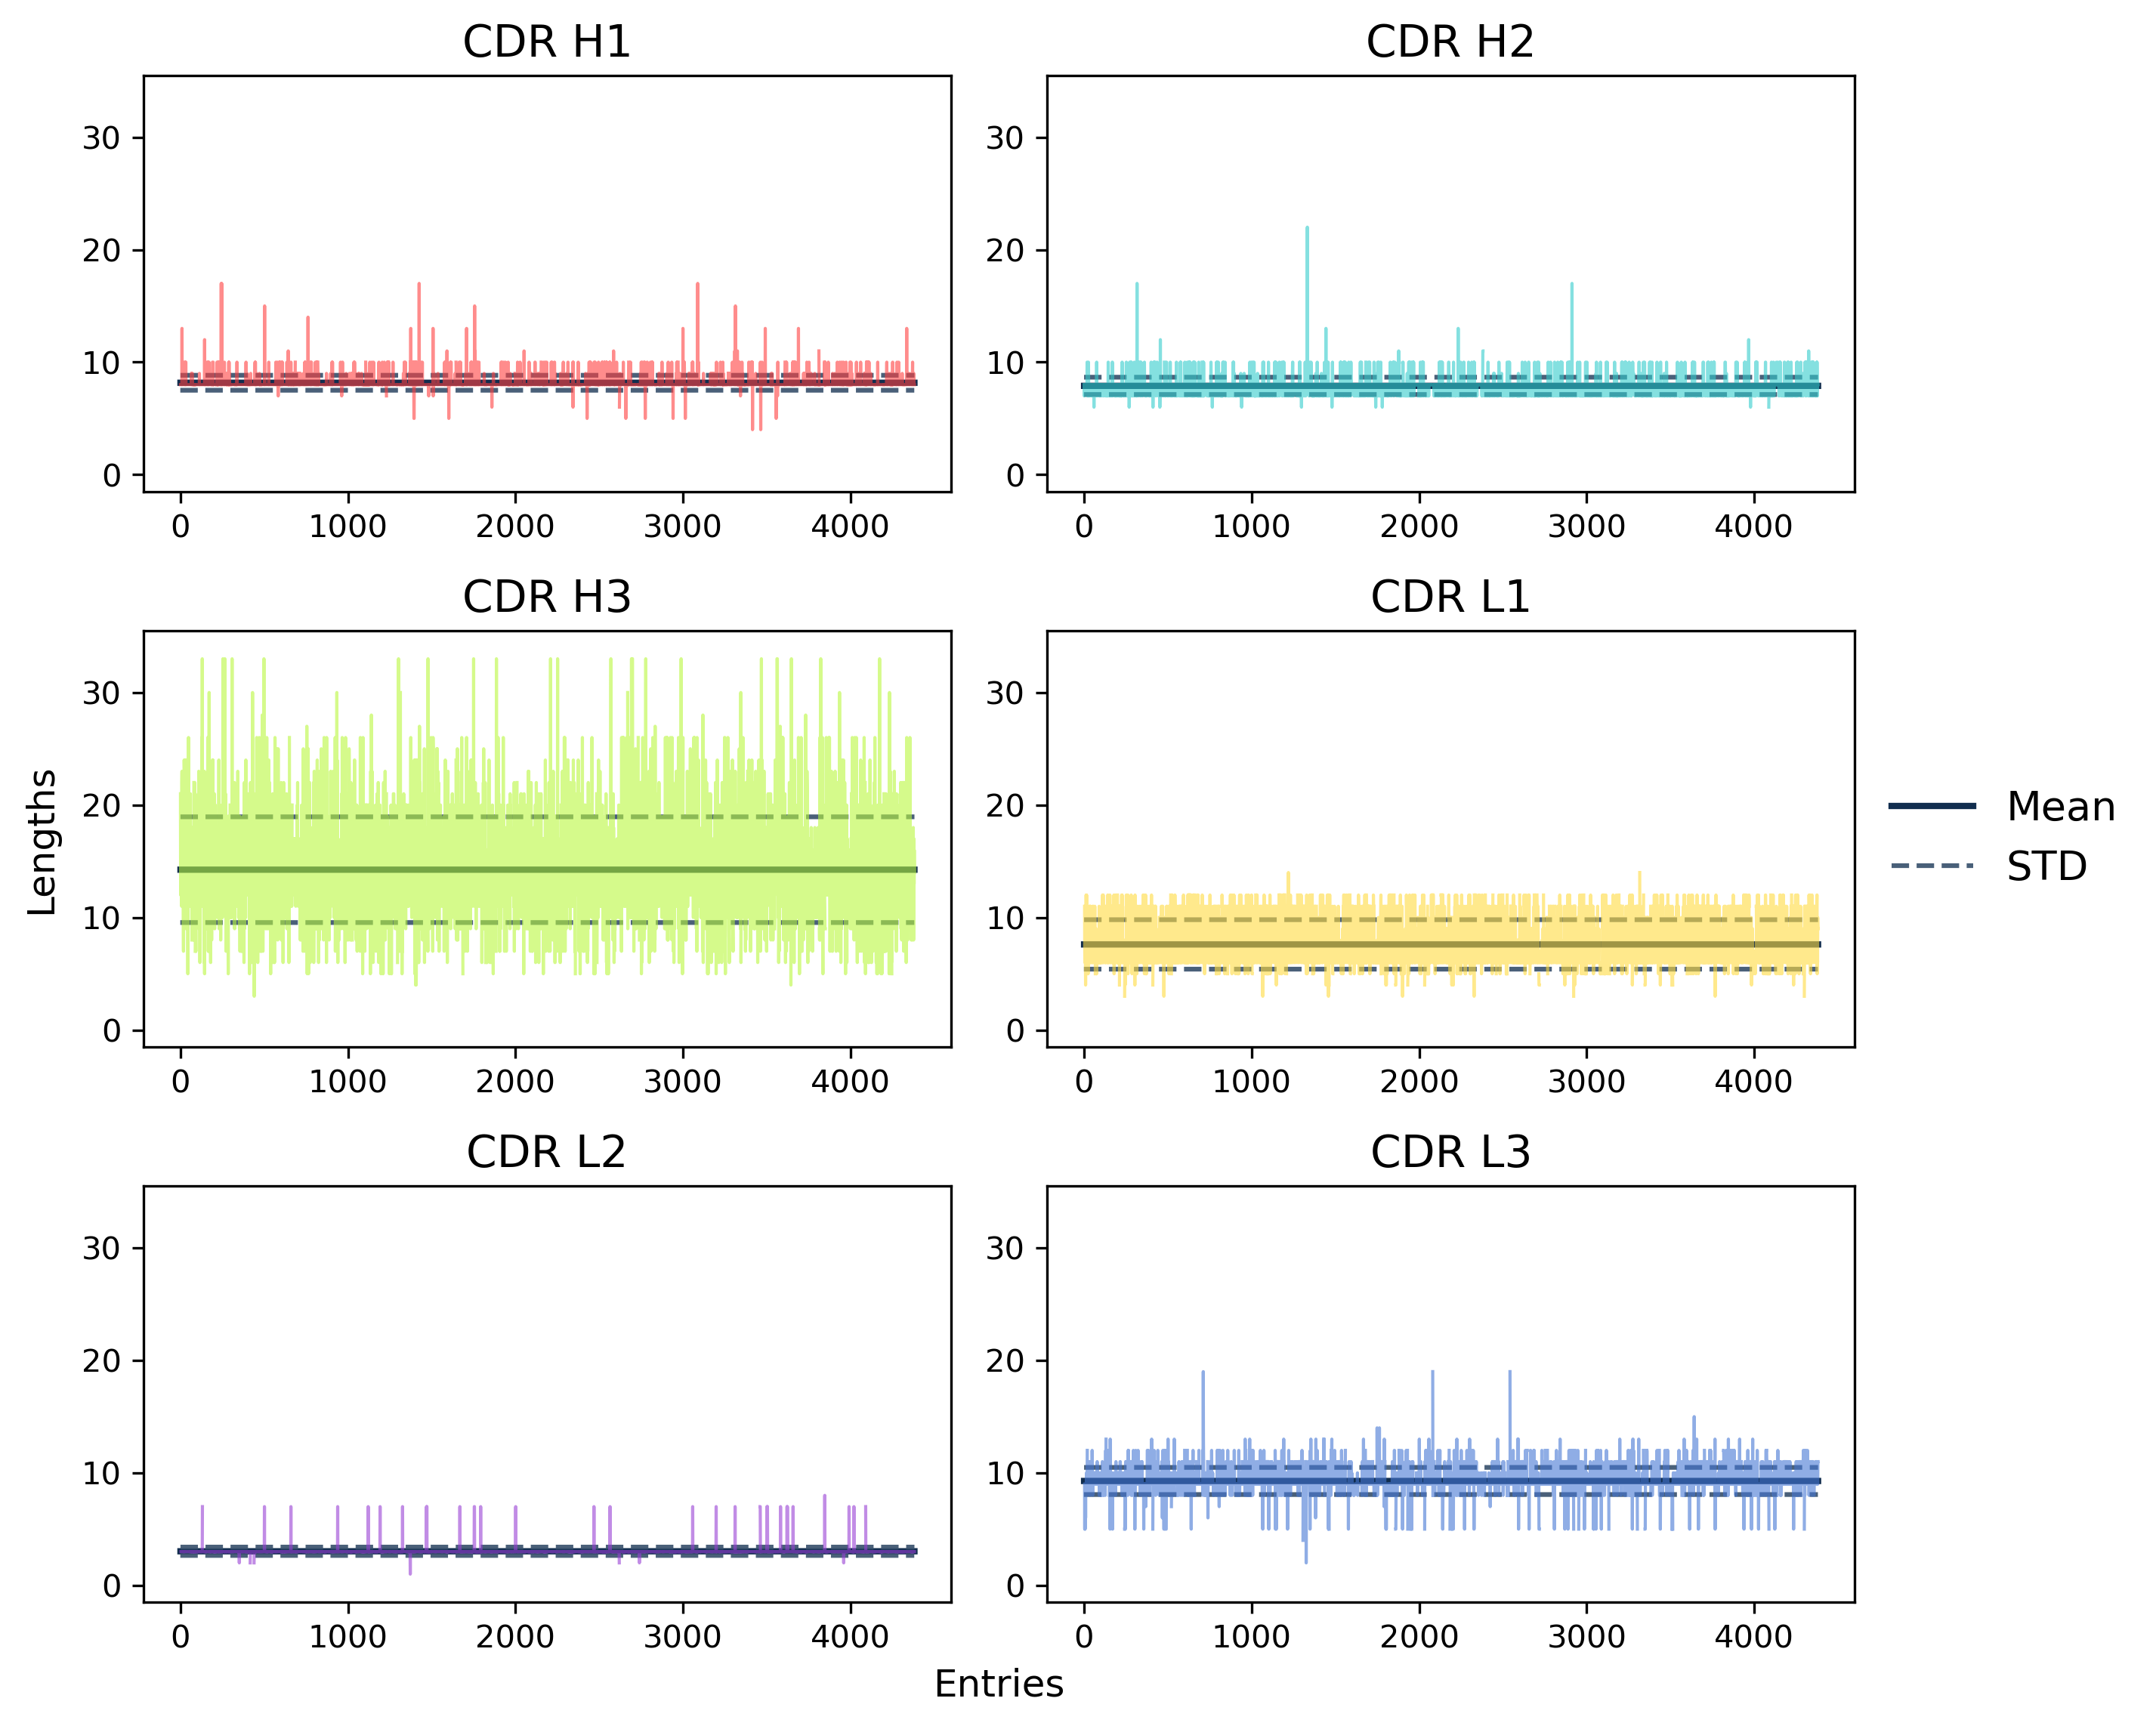

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), dpi=300)
ax = ax.flatten()
#figure = plt.subplots(figsize=(20, 10))

cdrs = [cdr_h1, cdr_h2, cdr_h3, cdr_l1, cdr_l2, cdr_l3]
titles = ['CDR H1', 'CDR H2', 'CDR H3', 'CDR L1', 'CDR L2', 'CDR L3']
colors = ['#FF4040', '#33CCCC', '#B9F73E', '#FFDB40', '#983FD5', '#4577D4']
labels = ['Mean', 'STD']

all_lengths = [v for cdr in cdrs for v in cdr.values() if v is not None]
min_length, max_length = min(all_lengths), max(all_lengths)


for n, cdr in enumerate(cdrs):
    x = np.arange(1, len(cdr.keys())+1, 1)
    
    df = pd.DataFrame(cdr.values(), index=cdr.keys()).describe()
    mean = df.loc['mean']
    std = df.loc['std']
    
    ax[n].plot(x, [mean]*len(cdr.values()), alpha=1, color='#112d4e', linestyle='solid', linewidth=2)
    ax[n].plot(x, [mean+std]*len(cdr.values()), [mean-std]*len(cdr.values()), alpha=0.9, color='#364f6b', linestyle='dashed', linewidth=1.5)
    ax[n].plot(x, cdr.values(), alpha=0.6, color=colors[n], linewidth=1)
    
    ax[n].set_ylim([min_length-2.5, max_length+2.5]) 
    ax[3].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
    ax[n].set_title(titles[n], fontsize=14)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Entries", fontsize=12)
plt.ylabel("Lengths", fontsize=12)

fig.tight_layout()
plt.show()
    
fig.tight_layout()
plt.show()


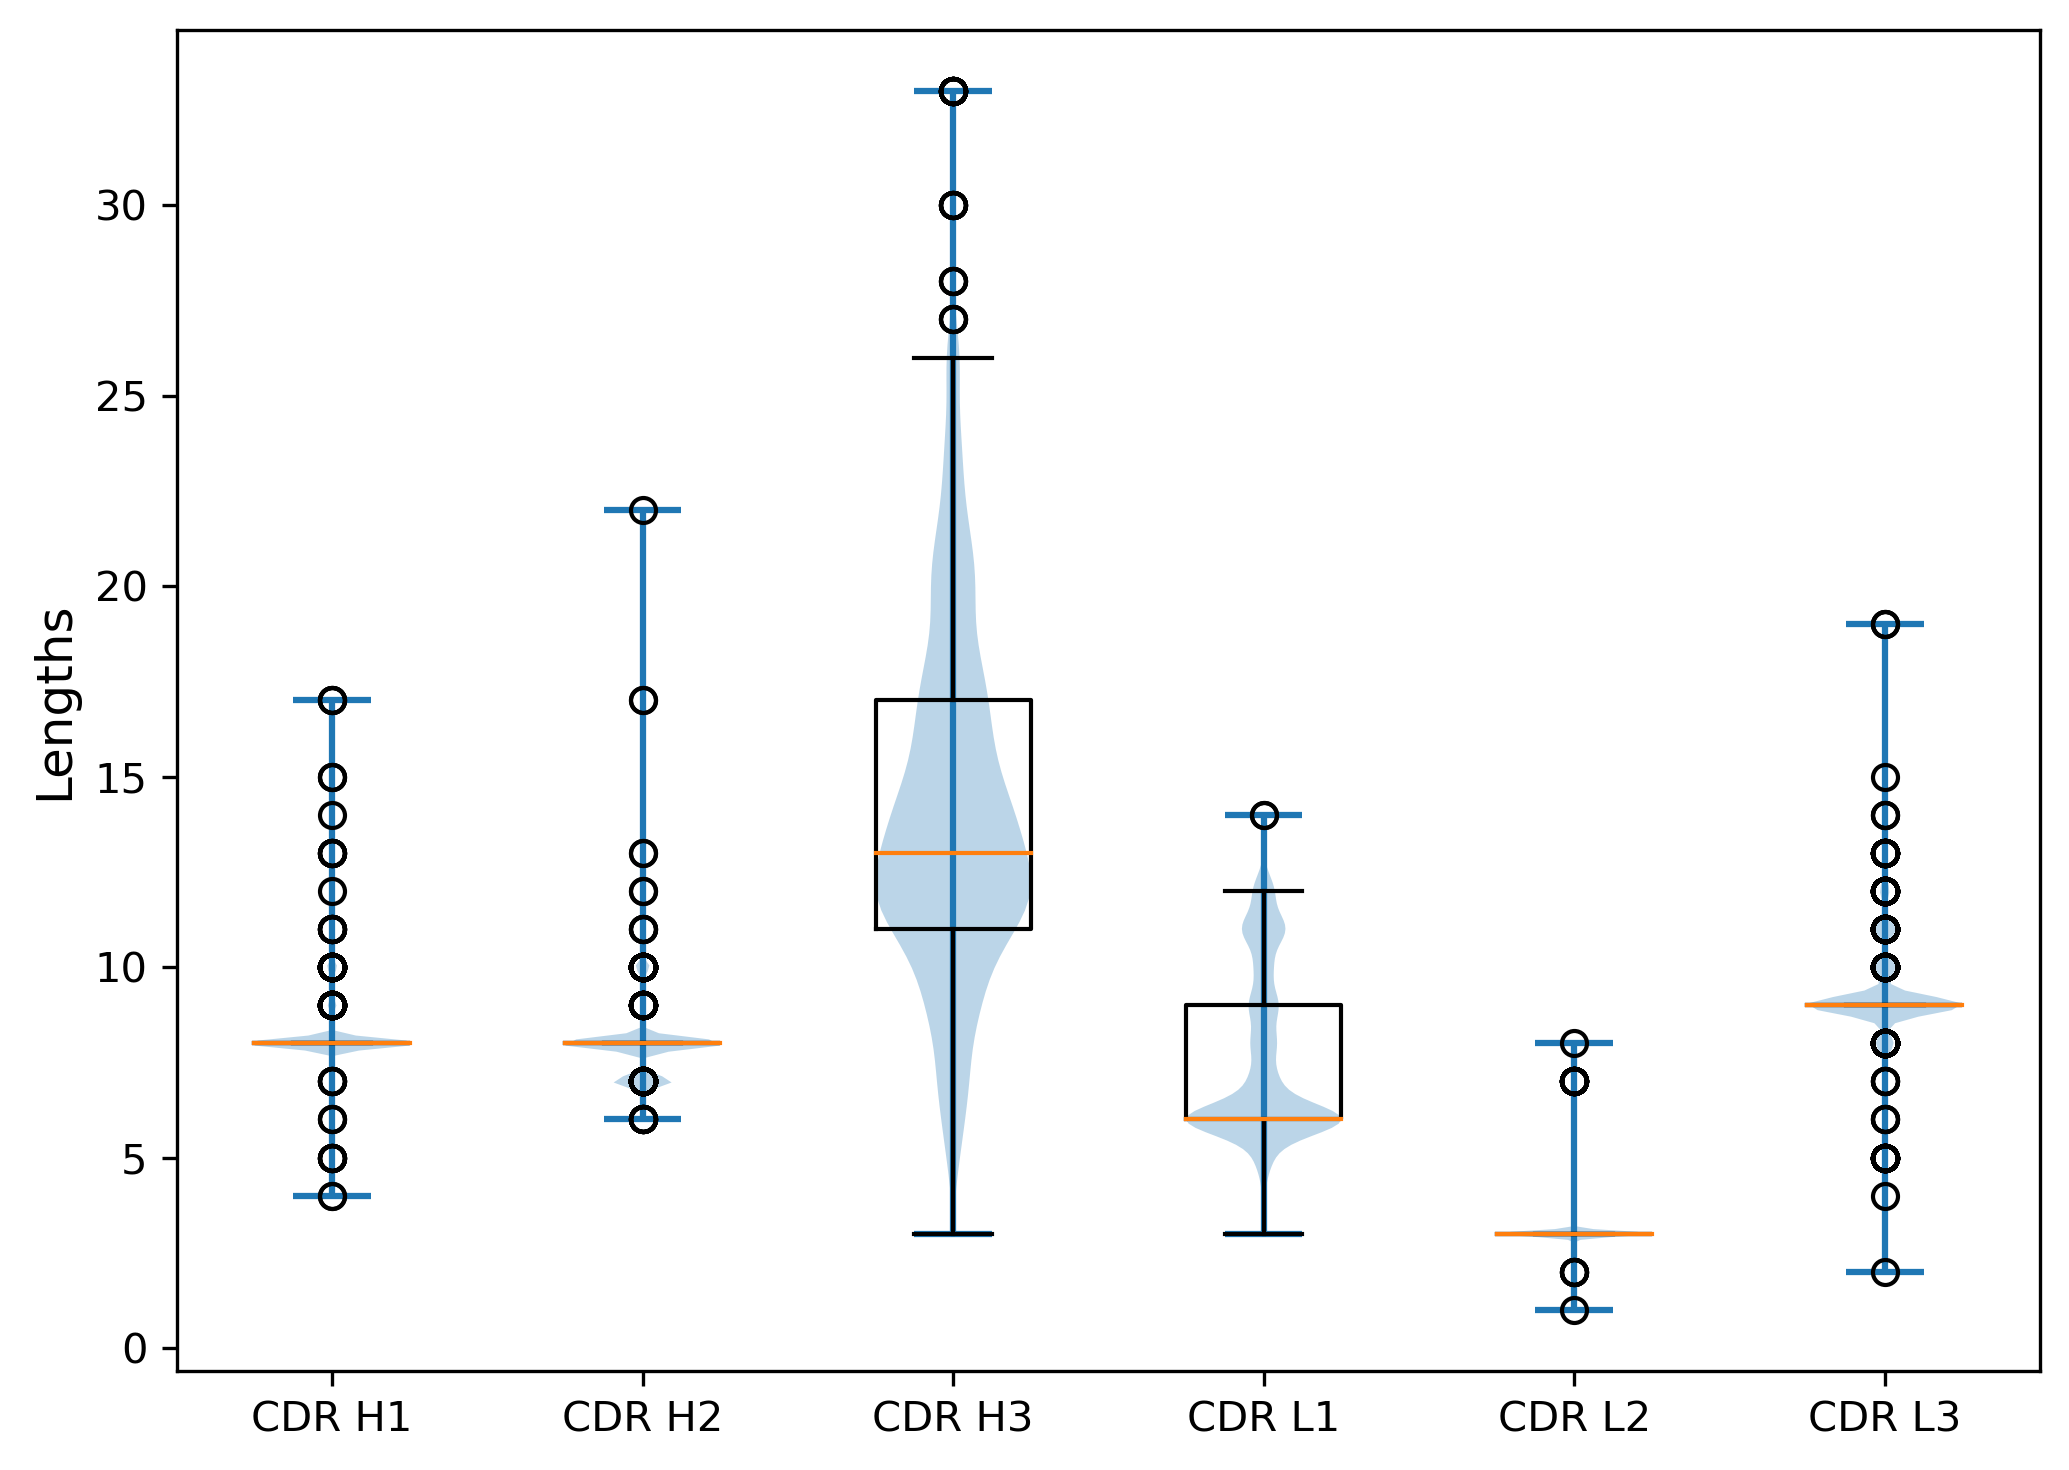

In [15]:
plt.figure(figsize=(7, 5), dpi=300)

clean_values = []

for n, cdr in enumerate(cdrs):
    no_none = [c for c in cdr.values() if c is not None]
    clean_values.append(no_none)
 
plt.boxplot(clean_values)
plt.violinplot(clean_values)
#plt.xlabel("CDRS", fontsize=12)
plt.ylabel("Lengths", fontsize=12)
plt.xticks(np.arange(1, len(cdrs) + 1, 1), titles)

plt.tight_layout()
plt.show()

In [18]:
cdr_l1_rmsd_corr = defaultdict(list)
cdr_l2_rmsd_corr = defaultdict(list)
cdr_l3_rmsd_corr = defaultdict(list)
cdr_h1_rmsd_corr = defaultdict(list)
cdr_h2_rmsd_corr = defaultdict(list)
cdr_h3_rmsd_corr = defaultdict(list)

for i, j in rmsds.items():
    for m, n in cdr_l1.items():
        if i == m:
            cdr_l1_rmsd_corr[i].extend(j)
            cdr_l1_rmsd_corr[i].append(n)
            
for i, j in rmsds.items():
    for m, n in cdr_h2.items():
        if i == m:
            cdr_l2_rmsd_corr[i].extend(j)
            cdr_l2_rmsd_corr[i].append(n)
            
for i, j in rmsds.items():
    for m, n in cdr_h3.items():
        if i == m:
            cdr_l3_rmsd_corr[i].extend(j)
            cdr_l3_rmsd_corr[i].append(n)

for i, j in rmsds.items():
    for m, n in cdr_h1.items():
        if i == m:
            cdr_h1_rmsd_corr[i].extend(j)
            cdr_h1_rmsd_corr[i].append(n)
            
for i, j in rmsds.items():
    for m, n in cdr_h2.items():
        if i == m:
            cdr_h2_rmsd_corr[i].extend(j)
            cdr_h2_rmsd_corr[i].append(n)
            
for i, j in rmsds.items():
    for m, n in cdr_h3.items():
        if i == m:
            cdr_h3_rmsd_corr[i].extend(j)
            cdr_h3_rmsd_corr[i].append(n)

In [19]:
print(len(cdr_l1_rmsd_corr.keys()))
print(len(cdr_l2_rmsd_corr.keys()))
print(len(cdr_l3_rmsd_corr.keys()))
print(len(cdr_h1_rmsd_corr.keys()))
print(len(cdr_h2_rmsd_corr.keys()))
print(len(cdr_h3_rmsd_corr.keys()))

531
531
531
531
531
531


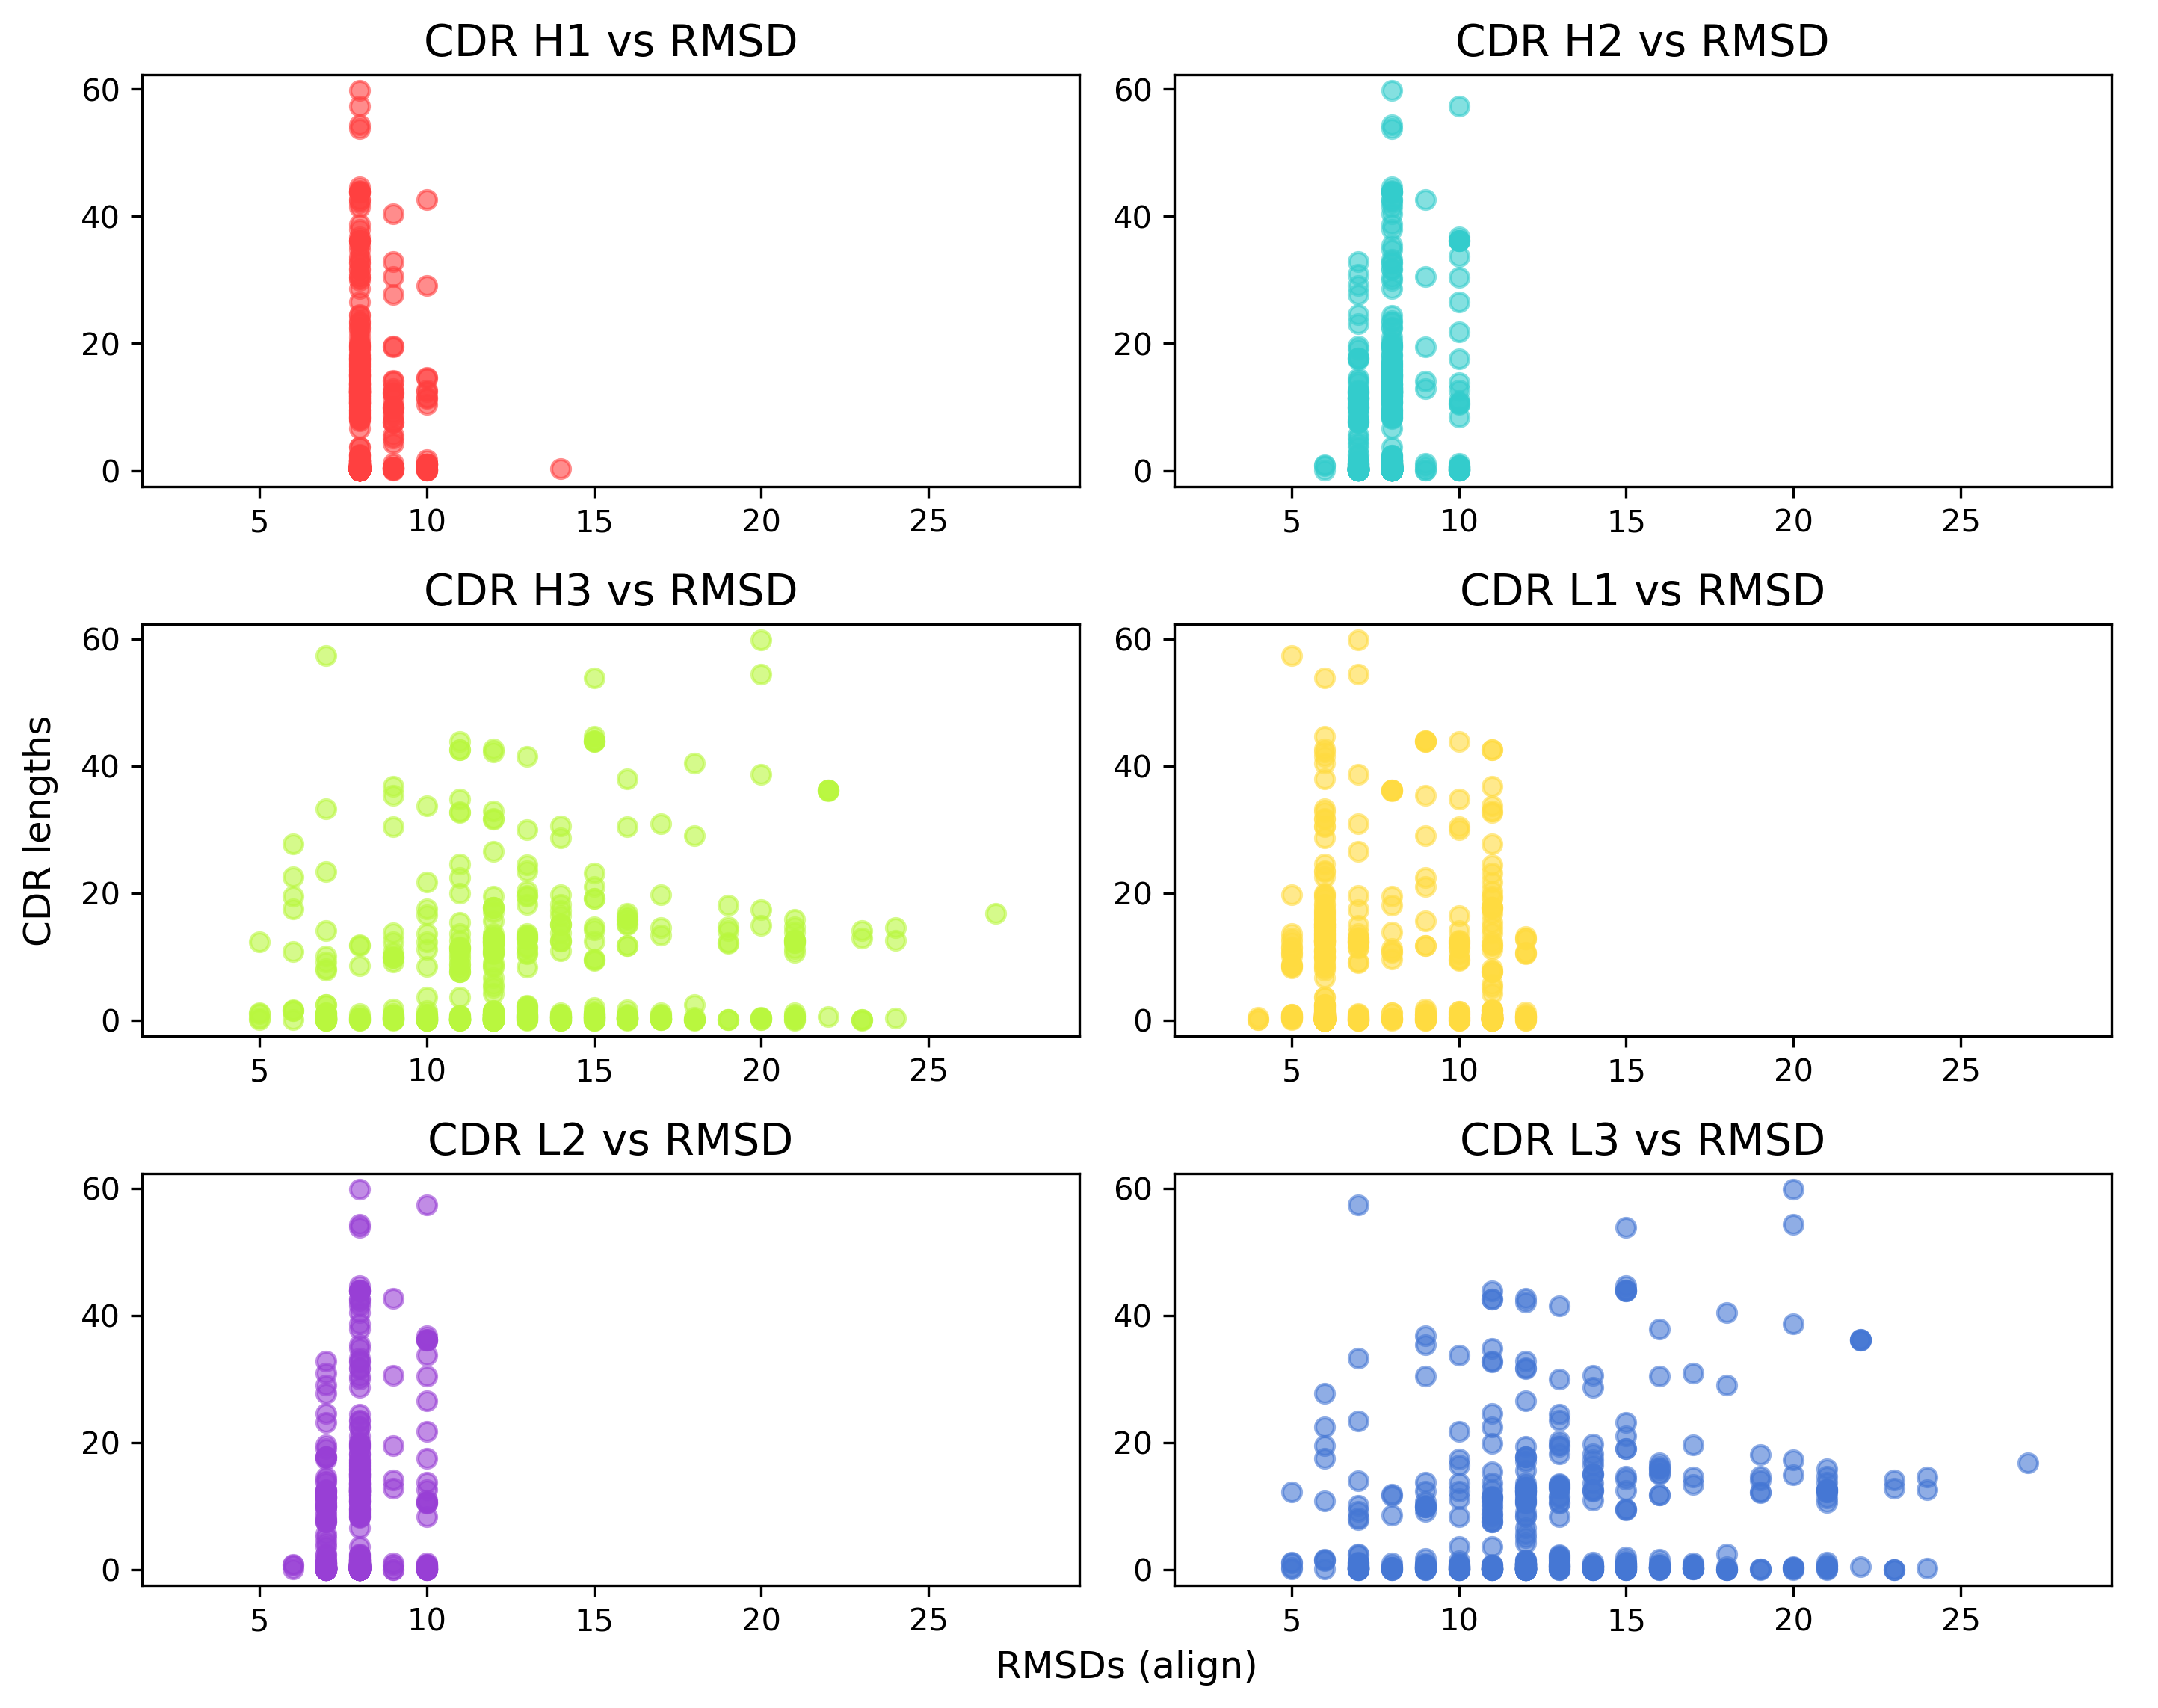

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), dpi=300)
ax = ax.flatten()

cdrs_corr = [cdr_h1_rmsd_corr, cdr_h2_rmsd_corr, cdr_h3_rmsd_corr, cdr_l1_rmsd_corr, cdr_l2_rmsd_corr, cdr_l3_rmsd_corr]
titles = ['CDR H1 vs RMSD', 'CDR H2 vs RMSD', 'CDR H3 vs RMSD', 'CDR L1 vs RMSD', 'CDR L2 vs RMSD', 'CDR L3 vs RMSD']
colors = ['#FF4040', '#33CCCC', '#B9F73E', '#FFDB40', '#983FD5', '#4577D4']
#labels = ['Mean', 'STD']

all_lengths_align = [v[0] for cdr in cdrs_corr for v in cdr.values() if v is not None]
all_lengths_super = [v[1] for cdr in cdrs_corr for v in cdr.values() if v is not None]
all_lengths_cdr = [v[2] for cdr in cdrs_corr for v in cdr.values() if v is not None]
min_length_align, max_length_align = min(all_lengths_align), max(all_lengths_align)
min_length_super, max_length_super = min(all_lengths_super), max(all_lengths_super)
min_length_cdr, max_length_cdr = min(all_lengths_cdr), max(all_lengths_cdr)


for n, cdr in enumerate(cdrs_corr):
    v_align_corr = [v[0] for v in cdr.values()]
    v_super_corr = [v[1] for v in cdr.values()]
    v_cdr_corr = [v[2] for v in cdr.values()]
    
    df = pd.DataFrame(cdr.values(), index=cdr.keys()).describe()
    mean = df.loc['mean']
    std = df.loc['std']
    
    #ax[n].plot(x, [mean[0]]*len(cdr.values()), alpha=1, color='#112d4e', linestyle='solid', linewidth=2)
    #ax[n].plot(x, [mean[0]+std[0]]*len(cdr.values()), [mean[0]-std[0]]*len(cdr.values()), alpha=0.9, color='#364f6b', linestyle='dashed', linewidth=1.5)
    ax[n].scatter(v_cdr_corr, v_align_corr, alpha=0.6, color=colors[n], linewidth=1)
    
    ax[n].set_ylim([min_length_align-2.5, max_length_align+2.5]) 
    ax[n].set_xlim([min_length_cdr-2.5, max_length_cdr+2.5]) 
    #ax[3].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
    ax[n].set_title(titles[n], fontsize=14)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("RMSDs (align)", fontsize=12)
plt.ylabel("CDR lengths", fontsize=12)

fig.tight_layout()
plt.show()
    
fig.tight_layout()
plt.show()

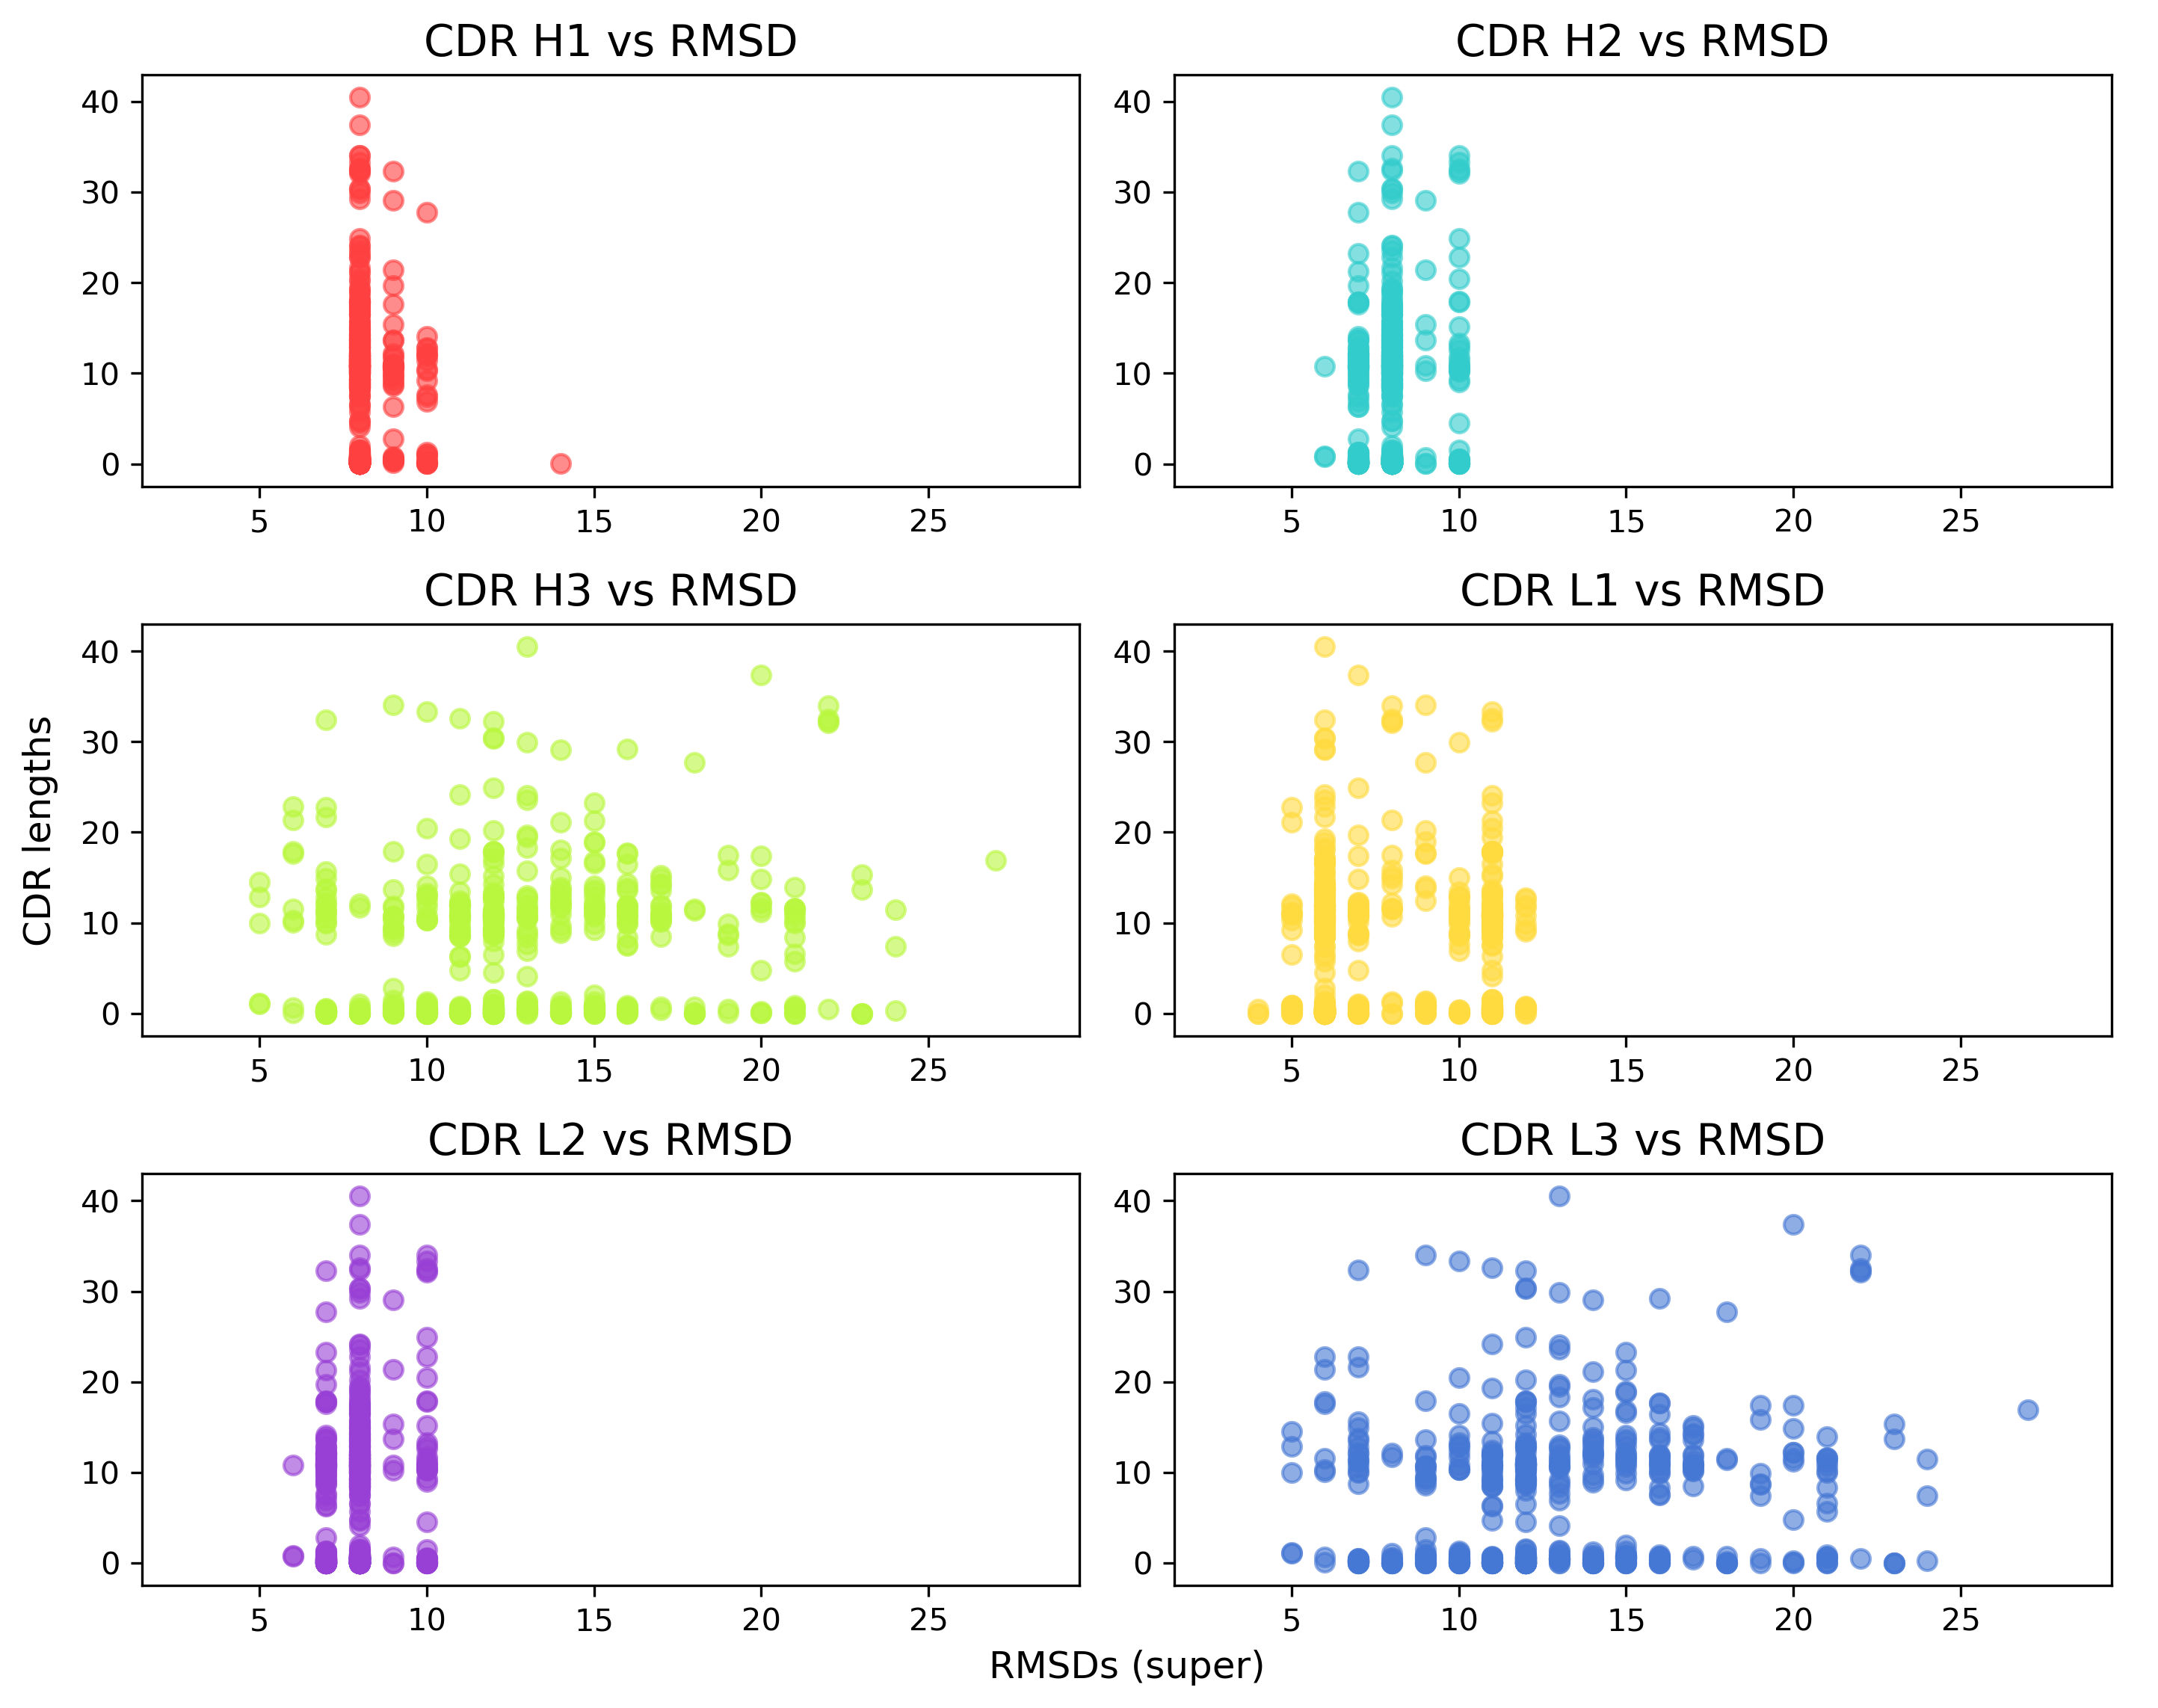

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), dpi=300)
ax = ax.flatten()

cdrs_corr = [cdr_h1_rmsd_corr, cdr_h2_rmsd_corr, cdr_h3_rmsd_corr, cdr_l1_rmsd_corr, cdr_l2_rmsd_corr, cdr_l3_rmsd_corr]
titles = ['CDR H1 vs RMSD', 'CDR H2 vs RMSD', 'CDR H3 vs RMSD', 'CDR L1 vs RMSD', 'CDR L2 vs RMSD', 'CDR L3 vs RMSD']
colors = ['#FF4040', '#33CCCC', '#B9F73E', '#FFDB40', '#983FD5', '#4577D4']
#labels = ['Mean', 'STD']

all_lengths_align = [v[0] for cdr in cdrs_corr for v in cdr.values() if v is not None]
all_lengths_super = [v[1] for cdr in cdrs_corr for v in cdr.values() if v is not None]
all_lengths_cdr = [v[2] for cdr in cdrs_corr for v in cdr.values() if v is not None]
min_length_align, max_length_align = min(all_lengths_align), max(all_lengths_align)
min_length_super, max_length_super = min(all_lengths_super), max(all_lengths_super)
min_length_cdr, max_length_cdr = min(all_lengths_cdr), max(all_lengths_cdr)


for n, cdr in enumerate(cdrs_corr):
    v_align_corr = [v[0] for v in cdr.values()]
    v_super_corr = [v[1] for v in cdr.values()]
    v_cdr_corr = [v[2] for v in cdr.values()]
    
    df = pd.DataFrame(cdr.values(), index=cdr.keys()).describe()
    mean = df.loc['mean']
    std = df.loc['std']
    
    #ax[n].plot(x, [mean[0]]*len(cdr.values()), alpha=1, color='#112d4e', linestyle='solid', linewidth=2)
    #ax[n].plot(x, [mean[0]+std[0]]*len(cdr.values()), [mean[0]-std[0]]*len(cdr.values()), alpha=0.9, color='#364f6b', linestyle='dashed', linewidth=1.5)
    ax[n].scatter(v_cdr_corr, v_super_corr, alpha=0.6, color=colors[n], linewidth=1)
    
    ax[n].set_ylim([min_length_super-2.5, max_length_super+2.5]) 
    ax[n].set_xlim([min_length_cdr-2.5, max_length_cdr+2.5]) 
    #ax[3].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
    ax[n].set_title(titles[n], fontsize=14)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("RMSDs (super)", fontsize=12)
plt.ylabel("CDR lengths", fontsize=12)

fig.tight_layout()
plt.show()
    
fig.tight_layout()
plt.show()